https://leetcode.com/problems/the-skyline-problem/

In [463]:
%load_ext memory_profiler

In [69]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from jupyterthemes import jtplot

jtplot.style('gruvboxd')
matplotlib.use('nbagg')

def plot_input(buildings):
    plt.figure()
    for L, R, H in buildings:
        plt.fill_between([L, R], 0, H, alpha=0.2)
    plt.grid(False)
    plt.show()
    
def plot_output(skyline):
    plt.figure()
    x0, y0 = 0, 0
    for x, y in skyline:
        plt.plot([x0, x, x], [y0, y0, y], 'o-', c='w')
        plt.scatter([x], [y], c='w', s=50)
        x0, y0 = x, y
    plt.grid(False)
    plt.show()
    
def plot_input_output(buildings, skyline):
    plt.figure()
    for L, R, H in buildings:
        plt.fill_between([L, R], 0, H, alpha=0.2)
    x0, y0 = 0, 0
    for x, y in skyline:
        plt.plot([x0, x, x], [y0, y0, y], '-', c='w')
        plt.scatter([x], [y], c='w', s=50)
        x0, y0 = x, y
    plt.grid(False)
    plt.show()

# Solution 1

In [465]:
import heapq

class Solution:
    def getSkyline(self, buildings):
        
        events = []
        for i, (L, R, H) in enumerate(buildings):
            heapq.heappush(events, (L, i))
            heapq.heappush(events, (R, i))
        
        skyline = []
        queue = {}
        
        while events:
            
            # get all events in next point
            point = events[0][0]
            inds = []
            
            while events and events[0][0] == point:
                _, i = heapq.heappop(events)
                inds.append(i)
            
            # add/pop hights
            for i in inds:
                if i in queue:
                    del queue[i]
                else:
                    queue[i] = buildings[i][2]
            
            # append max height (if not equal to previous)
            height = max(queue.values()) if queue else 0
            if not skyline or height != skyline[-1][1]:
                skyline.append([point, height])
            
        return skyline

<IPython.core.display.Javascript object>


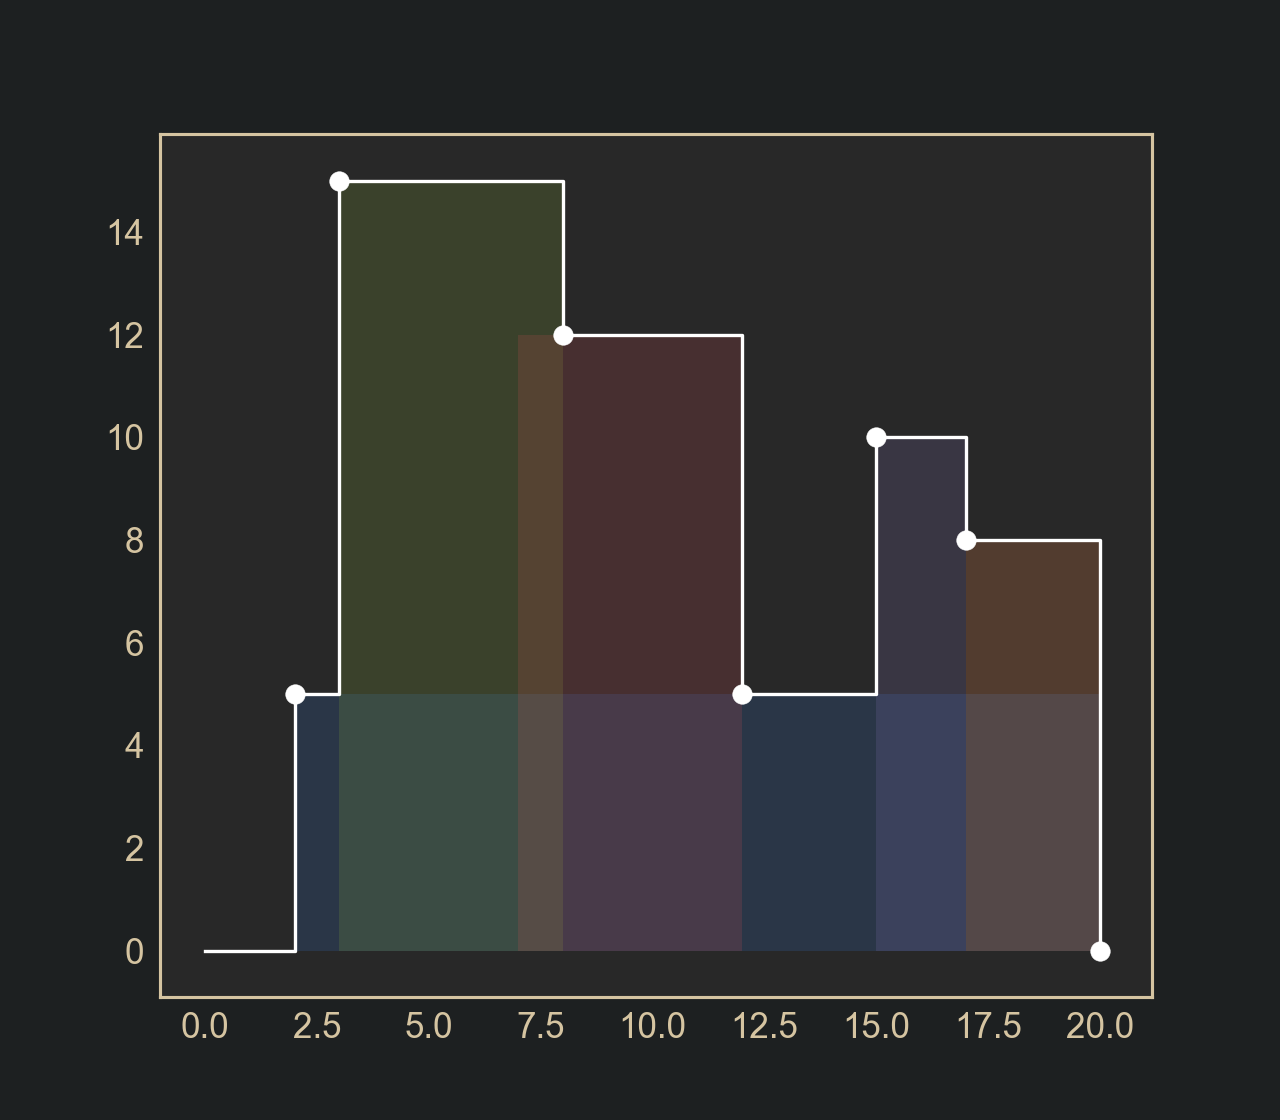

In [461]:
%matplotlib notebook

#buildings = [[2, 9, 10], [3, 7, 15]]
#buildings = [[2, 9, 10], [3, 10, 15]]
#buildings = [[2, 9, 10], [3, 9, 15]]
#buildings = [[2, 9, 10], [3, 7, 15], [5, 12, 12], [15, 20, 10], [19, 24, 8]]
#buildings = [[2, 9, 10], [3, 7, 15], [8, 12, 12], [15, 20, 10], [19, 24, 8]]
buildings = [[2, 20, 5], [3, 8, 15], [7, 12, 12], [15, 17, 10], [17, 20, 8]]
#buildings = [[2, 20, 5], [3, 8, 15], [7, 12, 12], [15, 17, 10], [17, 19, 8]]

skyline = Solution().getSkyline(buildings)
plot_input_output(buildings, skyline)

In [462]:
%timeit Solution().getSkyline([[2, 20, 5], [3, 8, 15], [7, 12, 12], [15, 17, 10], [17, 19, 8]])

13.4 µs ± 366 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [464]:
%memit Solution().getSkyline([[2, 20, 5], [3, 8, 15], [7, 12, 12], [15, 17, 10], [17, 19, 8]])

peak memory: 131.89 MiB, increment: -0.23 MiB


# Solution 2

In [497]:
import heapq
from itertools import chain

class Solution:
    def getSkyline(self, buildings):
        
        events = sorted(chain(*[[(L, -H, R), (R, 0, 0)] for L, R, H in buildings]))
        
        skyline = [[0, 0]]
        queue = [(0, float('inf'))]
        
        for point, negH, R in events:
            
            while queue[0][1] <= point: 
                heapq.heappop(queue)
            
            if negH: 
                heapq.heappush(queue, (negH, R))
                
            height = -queue[0][0]
            if skyline[-1][1] != height:
                skyline.append([point, height])
            
        return skyline[1:]

<IPython.core.display.Javascript object>


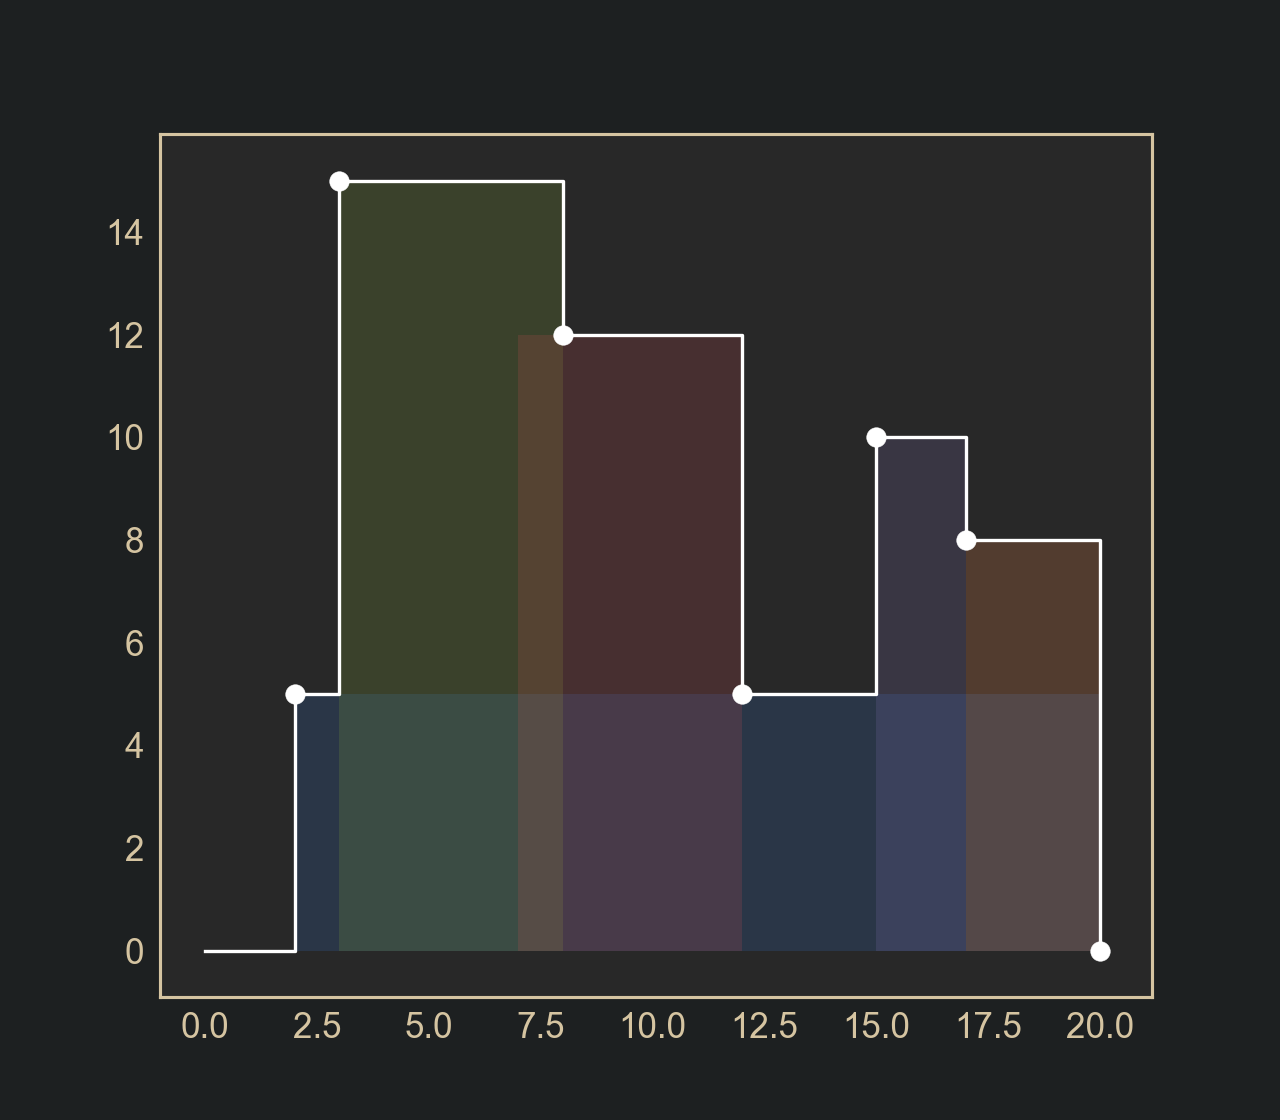

In [500]:
%matplotlib notebook

#buildings = [[2, 9, 10], [3, 7, 15]]
#buildings = [[2, 9, 10], [3, 10, 15]]
#buildings = [[2, 9, 10], [3, 9, 15]]
#buildings = [[2, 9, 10], [3, 7, 15], [5, 12, 12], [15, 20, 10], [19, 24, 8]]
#buildings = [[2, 9, 10], [3, 7, 15], [8, 12, 12], [15, 20, 10], [19, 24, 8]]
buildings = [[2, 20, 5], [3, 8, 15], [7, 12, 12], [15, 17, 10], [17, 20, 8]]
#buildings = [[2, 20, 5], [3, 8, 15], [7, 12, 12], [15, 17, 10], [17, 19, 8]]

skyline = Solution().getSkyline(buildings)
plot_input_output(buildings, skyline)

In [501]:
%timeit Solution().getSkyline([[2, 20, 5], [3, 8, 15], [7, 12, 12], [15, 17, 10], [17, 19, 8]])

8.54 µs ± 162 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [502]:
%memit Solution().getSkyline([[2, 20, 5], [3, 8, 15], [7, 12, 12], [15, 17, 10], [17, 19, 8]])

peak memory: 132.08 MiB, increment: -0.15 MiB
